In [1]:
from matplotlib import pyplot as plt

from funciones import *

import numpy as np
from numpy import pi

from numpy import exp, sqrt
from scipy.special import gammaincc, gamma, erf, exp1
from scipy import integrate

import tqdm

In [2]:
n_lines = 10**4
N = 10**4

y = generar_lineas(n_lines = n_lines, N = N, y0 = 0, yN = 0)
delta = (y.max(axis = 1) - y.min(axis = 1))
masas = np.linspace(0.01,5,1000)

In [3]:
def fuerza_casimir_numerica(a,m,delta) -> np.array (delta.shape): 
    
    primer_termino  = m**2  *exp1(a**2 * m**2 / delta**2) / (8 * pi)
    segundo_termino = - delta**2 * np.exp(-a**2 * m**2 / delta**2) / (8 * a**2 * pi)
    
    return primer_termino + segundo_termino

def fuerza_casimir_analitica(a,m) -> float:
    return -integrate.quad(lambda t: t**2 / (np.sqrt(t**2-m**2)*(np.exp(2*a*t)-1)),m,np.inf)[0] / np.pi

In [4]:
fuerzas_analiticas = []
for masa in masas:
    fuerzas_analiticas.append(fuerza_casimir_analitica(1,masa))
    
fuerzas_analiticas = np.array(fuerzas_analiticas) #shape = masas.shape 

<ipython-input-3-dda7971a9bf9>:9: RuntimeWarning: overflow encountered in exp
  return -integrate.quad(lambda t: t**2 / (np.sqrt(t**2-m**2)*(np.exp(2*a*t)-1)),m,np.inf)[0] / np.pi


In [5]:
fuerzas_numericas = []
desviaciones_estandar = []
fuerzas_casimir = []

for masa in masas:
    fuerza_casimir = fuerza_casimir_numerica(1,masa,delta) #delta.shape
    
    fuerzas_casimir.append(fuerza_casimir) #shape = (masa.shape, delta.shape)
    desviaciones_estandar.append(fuerza_casimir.std()) #shape = masa.shape
    fuerzas_numericas.append(fuerza_casimir.mean()) #shape =  masa.shape
    
fuerzas_numericas = np.array(fuerzas_numericas)
desviaciones_estandar = np.array(desviaciones_estandar)
fuerzas_casimir = np.array(fuerzas_casimir)

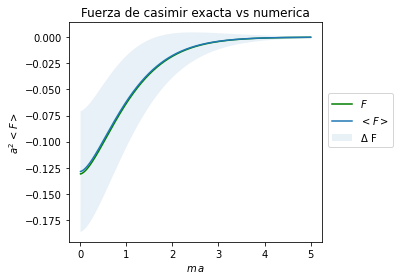

In [6]:
plt.plot(masas, fuerzas_analiticas, label = '$ F $', c = 'g')
plt.plot(masas, fuerzas_numericas, label = '$< F >$')
plt.fill_between(masas, fuerzas_numericas - desviaciones_estandar, fuerzas_numericas + desviaciones_estandar, 
                 alpha = 0.1, label = '$\\Delta$ F')

plt.legend(bbox_to_anchor=(1.3,0.7), loc="upper right")

plt.title('Fuerza de casimir exacta vs numerica')
plt.ylabel('$ a^2 \, <F>$')
plt.xlabel('$m \, a$')

plt.tight_layout()
plt.savefig('fuerza_casimir_masa_linea.pdf')
# plt.show()

In [18]:
errores = np.abs((fuerzas_casimir.T - fuerzas_analiticas) / fuerzas_analiticas)

In [40]:
((fuerzas_casimir.T - fuerzas_analiticas) / fuerzas_analiticas)[:,0].std()

0.4413603797361375

In [44]:
mean = ((fuerzas_casimir.T - fuerzas_analiticas) / fuerzas_analiticas)[:,0].mean()
mean

-0.017865640251443556

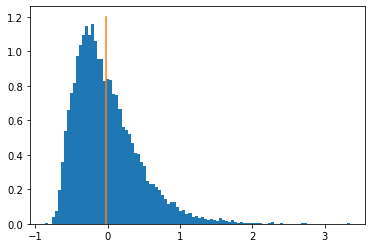

In [43]:
plt.hist(((fuerzas_casimir.T - fuerzas_analiticas) / fuerzas_analiticas)[:,0], bins = 100, density = True)
plt.plot([mean,mean],[0,1.2])
plt.show()